Simple Linear Regression example to predict the first year college grades of students from their high school SAT and GPA scores

__Prodigy University__ is seeking to enhance its enrollment process. They plan to do so by implementing a predictive analytics model aimed at identifying prospective students who demonstrate a high potential for academic success. 

__The goal is to develop a predictive model that can accurately forecast the first-year college GPA of applicants based on their SAT scores and high school scores. This model is intended to serve as a strategic tool for the admissions office, enabling them to efficiently shortlist candidates who not only meet the academic standards of the university but are also likely to thrive in their chosen fields of study.__ By doing so, the university aspires to optimize its student selection process, improve academic outcomes, and foster an environment of excellence and high achievement. 

 # 1) Load The data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('../Notebooks/Prodigy University Dataset.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   hs_gpa   1000 non-null   float64
 2   fy_gpa   1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [12]:
data.head()

,sat_sum,hs_gpa,fy_gpa
0,508,3.40,3.18
1,488,4.00,3.33
2,464,3.75,3.25
3,380,3.75,2.42
4,428,4.00,2.63


In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_sum,1000.0,413.31600,57.149472,212.0,372.00,412.000,452.00,576.0
hs_gpa,1000.0,3.19810,0.541647,1.8,2.80,3.200,3.70,4.5
fy_gpa,1000.0,2.46795,0.740805,0.0,1.98,2.465,3.02,4.0


In [18]:
data.corr()

,sat_sum,hs_gpa,fy_gpa
sat_sum,1.000000,0.430788,0.460281
hs_gpa,0.430788,1.000000,0.543353
fy_gpa,0.460281,0.543353,1.000000


<Axes: >

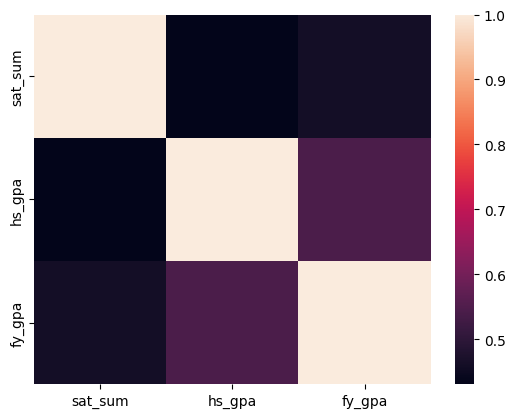

In [20]:
sns.heatmap(data.corr())

# 2)Data Preprocessing 

In [25]:
#converting data into numpy
x=data[['sat_sum','hs_gpa']].values

In [27]:
x.shape

(1000, 2)

In [29]:
y=data['fy_gpa'].values

In [41]:
y=y.reshape(-1,1) #because now it will convert in 1 column and 1000 rows.

In [43]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [53]:
X_train.shape

(800, 2)

# Revision 
import data ->ceate data frame -> analysis of data --> start preprocessing (preparing the x ,y set ) ---> data split --> apply standarization 

# 3) Building model 

In [57]:
import torch 


In [67]:
#convert numpy dataset into tensor
X_train=torch.tensor(X_train,dtype=torch.float32)

In [69]:
X_test=torch.tensor(X_test,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)

In [71]:
import torch.nn as nn

In [88]:
#Building model with 2 neurons
model= nn.Sequential(nn.Linear(2,2),   # 2 inputs with 2 neurons
                    nn.ReLU(),       #applying non-linarity 
                    nn.Linear(2,1))     #output layer

In [90]:
y_pred=model(X_test)

In [92]:
y_pred[:5]

tensor([[0.3882],
        [0.1778],
        [0.2123],
        [0.3663],
        [0.5508]], grad_fn=<SliceBackward0>)

# 4) Loss calculation 

In [80]:
from torch.nn import MSELoss

In [94]:
#calculating loss
criterion=MSELoss()
loss = criterion(y_pred,y_test)
print(loss)

tensor(4.8211, grad_fn=<MseLossBackward0>)


In [100]:
y_pred[:5]

tensor([[0.3882],
        [0.1778],
        [0.2123],
        [0.3663],
        [0.5508]], grad_fn=<SliceBackward0>)

In [98]:
y_test[:5]

tensor([[2.5400],
        [2.9800],
        [1.2400],
        [1.1300],
        [2.3700]])

In [102]:
model[0].weight

Parameter containing:
tensor([[ 0.6530, -0.2078],
        [ 0.5196,  0.1161]], requires_grad=True)

In [104]:
model[2].weight

Parameter containing:
tensor([[0.1438, 0.3741]], requires_grad=True)

# 5) Optimaization 
updating wieghts through backpropagation

# a) By Normal way
only single time will be update

In [109]:
import torch.optim as optim

In [111]:
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [113]:
loss.backward() #compute gradient for each parameter 
optimizer.step() #update parameter by above gradient and l.rate 

In [116]:
model[0].weight

Parameter containing:
tensor([[ 0.6531, -0.2077],
        [ 0.5201,  0.1166]], requires_grad=True)

In [118]:
model[2].weight

Parameter containing:
tensor([[0.1462, 0.3761]], requires_grad=True)

# Again prepare model for another various optimization techniques 

In [121]:
from torch.utils.data import TensorDataset,DataLoader
#for efficently managing sets and making batches too

In [123]:
train_data=TensorDataset(X_train,y_train)

In [125]:
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [127]:
# performance on train and test sets before apply optimization
train_loss=criterion(model(X_train),y_train)
test_loss=criterion(model(X_test),y_test)
print(f'without training :\nTrain loss : {train_loss:.4f}, Test Loss : {test_loss:.4f}')

without training :
Train loss : 8.6018, Test Loss : 8.8973


In [131]:
#looking at predictions
model(X_test)[:5]

tensor([[-0.4544],
        [-0.6725],
        [-0.6681],
        [-0.2929],
        [-0.3914]], grad_fn=<SliceBackward0>)

# b) Stochastic Gradient Descent

In [134]:
train_loader=DataLoader(train_data,batch_size=1,shuffle=True) #in SGD after every row back propagation will happen so batch size 1. 
#Execute the training loop
for epoch in range(10):
    for x,y in train_loader:
        #Forward pass
        pred=model(x)
        loss=criterion(pred,y)

        #Backward pass
        optimizer.zero_grad() #to reset optimizer
        loss.backward() #calculate gradient and store it for every parameter
        optimizer.step()

    train_loss=criterion(model(X_train),y_train).item() #to convert loss into python number
    test_loss=criterion(model(X_test),y_test).item()
    print(f'Epoch :{epoch+1}: train loss :{train_loss:.4f} , test loss :{test_loss:.4f}')
        

Epoch :1: train loss :0.6405 , test loss :0.7196
Epoch :2: train loss :0.5503 , test loss :0.6121
Epoch :3: train loss :0.5049 , test loss :0.5619
Epoch :4: train loss :0.4668 , test loss :0.5221
Epoch :5: train loss :0.4353 , test loss :0.4912
Epoch :6: train loss :0.4104 , test loss :0.4646
Epoch :7: train loss :0.3932 , test loss :0.4436
Epoch :8: train loss :0.3775 , test loss :0.4297
Epoch :9: train loss :0.3673 , test loss :0.4216
Epoch :10: train loss :0.3609 , test loss :0.4131


In [136]:
# looking prediction 
model(X_test)[:5]

tensor([[2.3774],
        [2.0693],
        [2.0120],
        [2.7303],
        [2.4329]], grad_fn=<SliceBackward0>)

# b) Batch gradient descent

In [149]:
#again create model and optimaizer
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [155]:
train_loader=DataLoader(train_data,batch_size=800,shuffle=True)
for epoch in range(1000): #we need to increass no. of epoch for effectice training.
    for x,y in train_loader:
        #forward pass
        pred=model(x)
        loss=criterion(pred,y)

        #Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%100==0:
        train_loss=criterion(model(X_train),y_train)
        test_loss=criterion(model(X_test),y_test)
        print(f'Epoch :{epoch+1} :- train loss :{train_loss:.4f}, test loss:{test_loss:.4f}')

Epoch :100 :- train loss :4.0618, test loss:4.2772
Epoch :200 :- train loss :2.3810, test loss:2.5525
Epoch :300 :- train loss :1.4857, test loss:1.6245
Epoch :400 :- train loss :1.0141, test loss:1.1289
Epoch :500 :- train loss :0.7670, test loss:0.8644
Epoch :600 :- train loss :0.6368, test loss:0.7216
Epoch :700 :- train loss :0.5666, test loss:0.6423
Epoch :800 :- train loss :0.5270, test loss:0.5961
Epoch :900 :- train loss :0.5028, test loss:0.5673
Epoch :1000 :- train loss :0.4867, test loss:0.5478


In [157]:
#looking prediction 
model(X_test)[:5]

tensor([[2.3577],
        [2.3047],
        [2.2813],
        [2.4405],
        [2.3584]], grad_fn=<SliceBackward0>)

 you can see how much epoch we needed to get better result in batch g.d. technique

# c) Mini-Batch Gradient Descent

In [161]:
#again reset model and optimaizer
#again create model and optimaizer
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [171]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
for epoch in range(500):
      for x,y in train_loader:
        #forward pass
        pred=model(x)
        loss=criterion(pred,y)

        #Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      if (epoch+1)%100==0:
        train_loss=criterion(model(X_train),y_train)
        test_loss=criterion(model(X_test),y_test)
        print(f'Epoch :{epoch+1} :- train loss :{train_loss:.4f}, test loss:{test_loss:.4f}')

Epoch :100 :- train loss :0.4972, test loss:0.5579
Epoch :200 :- train loss :0.4459, test loss:0.5002
Epoch :300 :- train loss :0.4119, test loss:0.4651
Epoch :400 :- train loss :0.3892, test loss:0.4419
Epoch :500 :- train loss :0.3746, test loss:0.4274


In [180]:
model(X_test)[:5]

tensor([[2.4191],
        [2.0765],
        [2.0609],
        [2.6672],
        [2.4894]], grad_fn=<SliceBackward0>)

# d) Common Optimization Techniques

# i) Gradient Descent with Momentum 

In [182]:
# Again need to rebuild our model 
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [190]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
for epoch in range(500):
    for x,y in train_loader:
        pred=model(x)
        loss=criterion(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%100==0 :
        train_loss=criterion(model(X_train),y_train)
        test_loss=criterion(model(X_test),y_test)
        print(f'epoch :{epoch+1} ==> train loss :{train_loss:.4f},test loss :{test_loss:.4f}')

epoch :100 ==> train loss :0.3419,test loss :0.4006
epoch :200 ==> train loss :0.3415,test loss :0.4009
epoch :300 ==> train loss :0.3412,test loss :0.4001
epoch :400 ==> train loss :0.3410,test loss :0.4006
epoch :500 ==> train loss :0.3407,test loss :0.4003


In [186]:
model(X_test)[:5]

tensor([[2.3091],
        [1.9076],
        [1.8717],
        [2.7633],
        [2.3899]], grad_fn=<SliceBackward0>)

In [188]:
y_test[:5]

tensor([[2.5400],
        [2.9800],
        [1.2400],
        [1.1300],
        [2.3700]])

# ii)Nesterov Momentum

#In this , gradient will calculate with consideration of future.

In [196]:
#again build the model
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9,nesterov=True)

In [198]:
train_loader=DataLoader(train_data,shuffle=True,batch_size=64)
for epoch in range(500):
    for x,y in train_loader:
        pred=model(x)
        loss=criterion(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%100==0:
        train_loss=criterion(model(X_train),y_train)
        test_loss=criterion(model(X_test),y_test)
        print(f'epoch :{epoch+1} ==> train loss :{train_loss:.4f}, test loss :{test_loss:.4f}')

epoch :100 ==> train loss :0.3472, test loss :0.4042
epoch :200 ==> train loss :0.3432, test loss :0.4043
epoch :300 ==> train loss :0.3422, test loss :0.4040
epoch :400 ==> train loss :0.3416, test loss :0.4032
epoch :500 ==> train loss :0.3411, test loss :0.4026


# iii) AdaGrad => Adaptive Gradient descent

In [205]:
#again build the model
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1)
)
optimizer=optim.Adagrad(model.parameters())

In [207]:
train_loader=DataLoader(train_data,shuffle=True,batch_size=64)
# Execute the training loop
for epoch in range(500): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = criterion(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 50 == 0: # printing after every 100 epochs
        train_loss = criterion(model(X_train), y_train).item()
        # print(epoch,': ', train_loss)
        test_loss = criterion(model(X_test), y_test).item()
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 50: Train Loss: 4.6476, Test Loss: 4.8736
Epoch 100: Train Loss: 2.9867, Test Loss: 3.1752
Epoch 150: Train Loss: 2.0172, Test Loss: 2.1784
Epoch 200: Train Loss: 1.4195, Test Loss: 1.5590
Epoch 250: Train Loss: 1.0435, Test Loss: 1.1655
Epoch 300: Train Loss: 0.8055, Test Loss: 0.9136
Epoch 350: Train Loss: 0.6538, Test Loss: 0.7506
Epoch 400: Train Loss: 0.5562, Test Loss: 0.6440
Epoch 450: Train Loss: 0.4930, Test Loss: 0.5736
Epoch 500: Train Loss: 0.4517, Test Loss: 0.5266


Adagrad has given us a high intial loss but the final loss values of VALUE on the train data and VALUE on the test data. Next let's try RMSProp!

# iv) RMS Prop

Just like we did with Adagrad earlier, here we need to use optim.RMSprop to intitialize the model with RMSProp. Even though we are going to use the default parameters, RMSprop also has parameters such as, learning rate, momentum etc,

In [212]:
# Reinitialising model weights
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)
optimizer = optim.RMSprop(model.parameters())

In [214]:
train_loader = DataLoader(train_data, batch_size= 64, shuffle=True) #800 is the number of samples in train set
# Execute the training loop
for epoch in range(500): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = criterion(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 50 == 0: # printing after every 100 epochs
        train_loss = criterion(model(X_train), y_train).item()
        # print(epoch,': ', train_loss)
        test_loss = criterion(model(X_test), y_test).item()
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 50: Train Loss: 0.3443, Test Loss: 0.4053
Epoch 100: Train Loss: 0.3416, Test Loss: 0.4064
Epoch 150: Train Loss: 0.3396, Test Loss: 0.3991
Epoch 200: Train Loss: 0.3415, Test Loss: 0.3987
Epoch 250: Train Loss: 0.3418, Test Loss: 0.3992
Epoch 300: Train Loss: 0.3400, Test Loss: 0.3987
Epoch 350: Train Loss: 0.3392, Test Loss: 0.3985
Epoch 400: Train Loss: 0.3396, Test Loss: 0.3985
Epoch 450: Train Loss: 0.3390, Test Loss: 0.3990
Epoch 500: Train Loss: 0.3384, Test Loss: 0.4006


With RMSProp we have clearly achieved our lowest loss values so far. We have got final loss values of VALUE on the train data and VALUE on the test data

# v) Adam

In [218]:
# Reinitialising model weights
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)
optimizer = optim.Adam(model.parameters())

In [220]:
train_loader = DataLoader(train_data, batch_size= 64, shuffle=True) #800 is the number of samples in train set
# Execute the training loop
for epoch in range(500): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = criterion(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 50 == 0: # printing after every 100 epochs
        train_loss = criterion(model(X_train), y_train).item()
        # print(epoch,': ', train_loss)
        test_loss = criterion(model(X_test), y_test).item()
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 50: Train Loss: 2.6235, Test Loss: 2.8095
Epoch 100: Train Loss: 0.7141, Test Loss: 0.8228
Epoch 150: Train Loss: 0.3625, Test Loss: 0.4272
Epoch 200: Train Loss: 0.3473, Test Loss: 0.4035
Epoch 250: Train Loss: 0.3460, Test Loss: 0.4022
Epoch 300: Train Loss: 0.3449, Test Loss: 0.4016
Epoch 350: Train Loss: 0.3438, Test Loss: 0.4012
Epoch 400: Train Loss: 0.3428, Test Loss: 0.4009
Epoch 450: Train Loss: 0.3418, Test Loss: 0.4004
Epoch 500: Train Loss: 0.3409, Test Loss: 0.3998


The Adam optimizer too has given us good overall performance. As per our observations, RMSProp is the best of the lot for optimizing the loss in our case. You've now explored a variety of optimization algorithms, each with unique approaches to navigating the complex landscape of neural network training.